# Network Visualization and Word Statistics for Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk
from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Execute the following cell to get the text of "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]

You now have the following variable:
* `r_j_string`: this string contains the full text of "Romeo and Juliet"

## Word Statistics

Make a list of the words in Romeo and Juliet by tokenizing `macbeth_string`, making all words lowercase, removing stopwords, and using the Porter stemmer to stem the words.

In [3]:
words=[]
lowers=[]
tokenized = word_tokenize(r_j_string)
stops= stopwords.words('english')
myStopWords = list(punctuation)+stops
for x in tokenized:
  lowers.append(x.lower())
for i in lowers:
  if i not in myStopWords:
    words.append(i)
words = [PorterStemmer().stem(w) for w in words]
print(words)


['tragedi', 'romeo', 'juliet', 'william', 'shakespear', 'content', 'prologu', 'act', 'scene', 'public', 'place', 'scene', 'ii', 'street', 'scene', 'iii', 'room', 'capuletâ\x80\x99', 'hous', 'scene', 'iv', 'street', 'scene', 'v.', 'hall', 'capuletâ\x80\x99', 'hous', 'act', 'ii', 'choru', 'scene', 'open', 'place', 'adjoin', 'capuletâ\x80\x99', 'garden', 'scene', 'ii', 'capuletâ\x80\x99', 'garden', 'scene', 'iii', 'friar', 'lawrenceâ\x80\x99', 'cell', 'scene', 'iv', 'street', 'scene', 'v.', 'capuletâ\x80\x99', 'garden', 'scene', 'vi', 'friar', 'lawrenceâ\x80\x99', 'cell', 'act', 'iii', 'scene', 'public', 'place', 'scene', 'ii', 'room', 'capuletâ\x80\x99', 'hous', 'scene', 'iii', 'friar', 'lawrenceâ\x80\x99', 'cell', 'scene', 'iv', 'room', 'capuletâ\x80\x99', 'hous', 'scene', 'v.', 'open', 'galleri', 'julietâ\x80\x99', 'chamber', 'overlook', 'garden', 'act', 'iv', 'scene', 'i.', 'friar', 'lawrenceâ\x80\x99', 'cell', 'scene', 'ii', 'hall', 'capuletâ\x80\x99', 'hous', 'scene', 'iii', 'juliet

Recall that for any Python list (for example `mylist`), you can get the word frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the n most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use this to print the 40 most frequently occurring words in Romeo and Juliet.

In [4]:
freq= nltk.FreqDist(words).most_common(40)
print(freq)

[('romeo', 296), ('thou', 277), ('juliet', 176), ('thi', 170), ('capulet', 149), ('love', 148), ('nurs', 143), ('thee', 138), ('come', 125), ('ladi', 112), ('shall', 110), ('friar', 103), ('mercutio', 83), ('good', 80), ('go', 79), ('benvolio', 77), ('enter', 76), ('iâ\x80\x99ll', 71), ('tybalt', 70), ('death', 69), ('night', 69), ('man', 66), ('lawrenc', 66), ('hath', 64), ('say', 63), ('one', 59), ('well', 58), ('pari', 57), ('sir', 57), ('make', 55), ('art', 55), ('give', 54), ('would', 54), ('day', 54), ('scene', 51), ('montagu', 50), ('may', 48), ('dead', 48), ('doth', 47), ('eye', 47)]


Do these words give you a good representation of the themes in the play?

The 40 most frequently appeared words somewhat accurately describe the theme of the play such as death, love and the main characters' names. 

*Bonus point (optional):*  Remove the character names from your list of words, and repeat the above process, commenting on whether you get a better set of words representing Romeo and Juliet's thematic content.

In [51]:
words=[]
lowers=[]
tokenized = word_tokenize(r_j_string)
stops= stopwords.words('english')
#for two-word names, I divided it up to two separate words and removed a duplicate (i.e. friar)
char=[ 
  'MERCUTIO', 
  'PARIS', 
  'MONTAGUE', 
  'LADY', 'MONTAGUE', 
  'ROMEO',
  'BENVOLIO',
  'ABRAM',
  'BALTHASAR', 
  'CAPULET',
  'JULIET', 
  'TYBALT', 
  'NURSE', 
  'PETER', 
  'SAMPSON', 
  'GREGORY', 
  'FRIAR','LAWRENCE',
  'JOHN'
]
charlow=[]
#make character names in lowercase; add to a new list called charlow
for j in char:
  charlow.append(j.lower())
#new stopword list
myStopWords = list(punctuation)+stops+charlow
for x in tokenized:
  lowers.append(x.lower())
for i in lowers:
  if i not in myStopWords:
    words.append(i)
words = [PorterStemmer().stem(w) for w in words]
freq= nltk.FreqDist(words).most_common(40)
print(freq)

[('thou', 277), ('thi', 170), ('love', 148), ('thee', 138), ('come', 125), ('shall', 110), ('good', 80), ('go', 79), ('enter', 76), ('iâ\x80\x99ll', 71), ('death', 69), ('night', 69), ('man', 66), ('hath', 64), ('say', 63), ('one', 59), ('well', 58), ('sir', 57), ('make', 55), ('art', 55), ('give', 54), ('would', 54), ('day', 54), ('scene', 51), ('may', 48), ('dead', 48), ('doth', 47), ('eye', 47), ('yet', 47), ('let', 46), ('fair', 44), ('tell', 44), ('hast', 43), ('like', 43), ('take', 42), ('upon', 42), ('â\x80\x99ti', 40), ('must', 40), ('marri', 40), ('lie', 40)]


After removing the character names, the list of 40 most frequently used words shows the plot and the thematic content more clearly with keywords such as 'love', 'death', 'night' still remaining.

In the cell below, assign your list of words into the variable `x` and then run the following cell to create a dataframe `df`.  This dataframe will contain one column for the words and one column for the corresponding word frequencies.

In [5]:
x = words

In [6]:
df = pd.DataFrame({'words': nltk.FreqDist(x).keys(),
                   'frequencies': nltk.FreqDist(x).values()})    

In [7]:
print(df)

           words  frequencies
0        tragedi            1
1          romeo          296
2         juliet          176
3        william            1
4     shakespear            1
...          ...          ...
3213       figur            1
3214    sacrific            1
3215       gloom            1
3216  pardonâd            1
3217      punish            1

[3218 rows x 2 columns]


Use the `head` method to look at the first five records in your dataframe:

In [8]:
print (df.head())

        words  frequencies
0     tragedi            1
1       romeo          296
2      juliet          176
3     william            1
4  shakespear            1


For the word frequencies, calculate the mean, median, mode, and trimmed mean.
* For the trimmed mean, you can choose what to trim, but comment on the number used for trimming.

In [9]:
df['frequencies'].mean()

4.50497203231821

In [10]:
df['frequencies'].median()

1.0

In [11]:
df['frequencies'].mode()

0    1
Name: frequencies, dtype: int64

In [12]:
# I trimmed the first and last 25% of the dataframe. Thus the new mean only calculated the mean of the middle 50%.
df.loc[int(0.25*3217):int(0.75*3217),'frequencies'].mean()

2.5065257924176505

Plot a histogram of the word frequencies.

<AxesSubplot: ylabel='Frequency'>

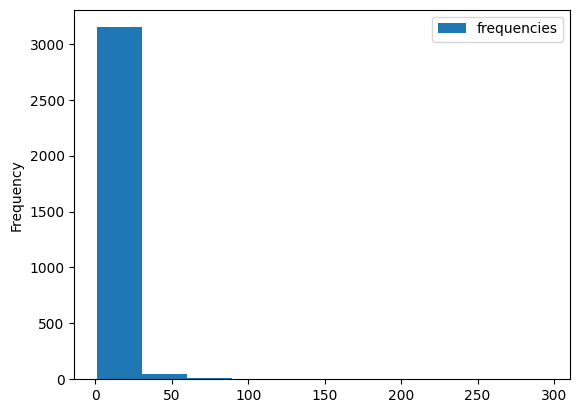

In [54]:
df.plot(y='frequencies', kind='hist')

Comment on the relative locations of the mean, median, mode, and trimmed mean, as well as what these measures tell you about word occurrences in the play.

The median of frequencies is 1 and accordingly, the modes are 0 and 1 which means most of the words have around 0 to 1 frequencies throughout the play. However with some outliers (frequencies of "romeo" and "juliet"), the mean is bumped to 4.50. After trimming the first and last 25% of the frequencies data, the trimmed mean decreases to 2.50 which is between the median and mean. Overall, this tells that most of the words only appear once with some exceptions that appears extremely frequently, such as character names and central themes of love and death. 

Calculate the standard deviation and the interquartile range (the difference of the 75% and 25% quantile)

In [14]:
df['frequencies'].std()

12.906449706674726

In [15]:
q1= df['frequencies'].quantile(0.25)
q3=df['frequencies'].quantile(0.75)
print (q3-q1)

2.0


Comment on how these measures of variation compare to each other and to the histogram plot.

The interquartile range is now between the median and trimmed mean. Comparing to the histogram plot, it shows that most of the frequencies dataset falls in the interquartile range.  

## Network Visualization

Make a network graphic relevant to Romeo and Juliet using the text of the play.
* You are free to use any information from the play that you want for nodes and edges.  
* You must clarify (in markdown cells) what information is contained in the graph and how you are measuring it.
* You should use either networkx or bokeh to make the network graph and visualize it inside this notebook; dash cytoscape will be too difficult to run properly in this environment.
  * *Another bonus point (**optional**)* -> if you want to try your hand at dash cytoscape, download this notebook and run it with Jupyter on your own computer, insert the dash cytoscape code into the notebook, and then email the completed notebook to me along with a screenshot of your dash cytoscape network graph visualization (this will require you to have Python, Jupyter, jupyter-dash, and etc installed on your system)

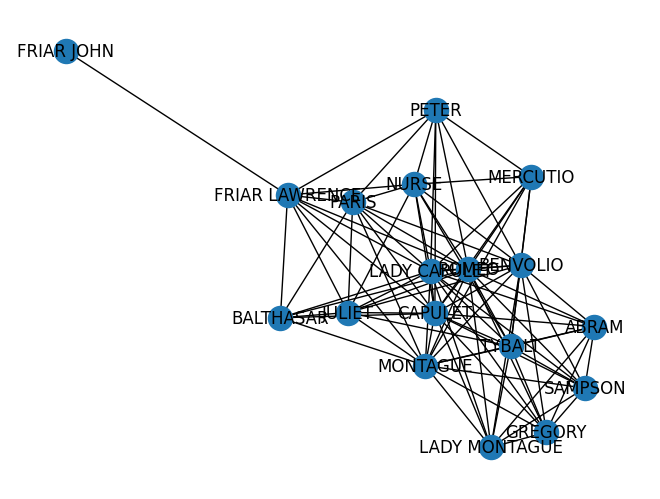

[('MERCUTIO', 'MONTAGUE'), ('MERCUTIO', 'ROMEO'), ('MERCUTIO', 'BENVOLIO'), ('MERCUTIO', 'CAPULET'), ('MERCUTIO', 'LADY CAPULET'), ('MERCUTIO', 'TYBALT'), ('MERCUTIO', 'NURSE'), ('MERCUTIO', 'PETER'), ('PARIS', 'MONTAGUE'), ('PARIS', 'ROMEO'), ('PARIS', 'BENVOLIO'), ('PARIS', 'BALTHASAR'), ('PARIS', 'CAPULET'), ('PARIS', 'LADY CAPULET'), ('PARIS', 'JULIET'), ('PARIS', 'NURSE'), ('PARIS', 'PETER'), ('PARIS', 'FRIAR LAWRENCE'), ('MONTAGUE', 'LADY MONTAGUE'), ('MONTAGUE', 'ROMEO'), ('MONTAGUE', 'BENVOLIO'), ('MONTAGUE', 'ABRAM'), ('MONTAGUE', 'BALTHASAR'), ('MONTAGUE', 'CAPULET'), ('MONTAGUE', 'LADY CAPULET'), ('MONTAGUE', 'JULIET'), ('MONTAGUE', 'TYBALT'), ('MONTAGUE', 'SAMPSON'), ('MONTAGUE', 'GREGORY'), ('MONTAGUE', 'FRIAR LAWRENCE'), ('LADY MONTAGUE', 'ROMEO'), ('LADY MONTAGUE', 'BENVOLIO'), ('LADY MONTAGUE', 'ABRAM'), ('LADY MONTAGUE', 'CAPULET'), ('LADY MONTAGUE', 'LADY CAPULET'), ('LADY MONTAGUE', 'TYBALT'), ('LADY MONTAGUE', 'SAMPSON'), ('LADY MONTAGUE', 'GREGORY'), ('ROMEO', 'BEN

In [56]:
#node: characters/ edges: how connected they are (how often do they appear in the same scene?)
import networkx as nx
scenes=r_j_string.split('SCENE')
#list of all characters (with names)
characters = [ 
  'MERCUTIO', 
  'PARIS', 
  'MONTAGUE', 
  'LADY MONTAGUE', 
  'ROMEO',
  'BENVOLIO',
  'ABRAM',
  'BALTHASAR', 
  'CAPULET',
  'LADY CAPULET', 
  'JULIET', 
  'TYBALT', 
  'NURSE', 
  'PETER', 
  'SAMPSON', 
  'GREGORY', 
  'FRIAR LAWRENCE', 
  'FRIAR JOHN'
]
#split a big chunk of r_j_string to a list of Acts
acts=r_j_string.split('ACT')[6:]

#creating a dictionary to show how often each character appears across scenes.
charnum = {}

#creating a dictionary to indicate the connections between each characters across scenes.
ties = {}
#iterating through each character; initialize the number of scenes each pair of characters are in together to 0.
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        ties[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

#iterate through each act in each scene
for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        #iterate to see if a character is actually in the scene
        for k in characters:
          #if a character is actually in the scene, add them to scenechars list.
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        #iterate through each pair; if they are talking in a scene, add 1.
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                ties[(scenechars[a],scenechars[b])] += 1

#deleting all the key,value pair where value is 0 (this is for convenience)
del_keys=[]
for k,v in ties.items():
  if v==0:
    del_keys.append(k)
for k in del_keys:
  ties.pop(k)

#make a list of edges from the dictionary connections; remove the value
edge_list=[]
for i in ties:
  edge_list.append(i)

#graph it out; add nodes and edges
G=nx.Graph()
#nodes are the characters
G.add_nodes_from(characters)
G.nodes()
#edges are the list of ties between characters across scenes
G.add_edges_from(edge_list)
#you can see how closely connected each character is to others by the number of edges (looks thicker for characters that are more central such as Romeo.)
nx.draw(G, with_labels=True)
plt.show()


    





Calculate the network density of your network graph.

In [17]:
nx.density(G)

0.6143790849673203

Comment on what the network density tells you.

The network density measures how many connections between nodes actually exist compared to all the possible number of connections (edges that present over all possible edges). The calculation above shows that almost 60% of all the possible connections between each character in Romeo and Juliet actually exists. 

Use at least two measures of node centrality to calculate which nodes are the "most important" nodes in your network graph.

In [18]:
nx.degree_centrality(G)

{'MERCUTIO': 0.47058823529411764,
 'PARIS': 0.5882352941176471,
 'MONTAGUE': 0.8235294117647058,
 'LADY MONTAGUE': 0.5294117647058824,
 'ROMEO': 0.9411764705882353,
 'BENVOLIO': 0.8235294117647058,
 'ABRAM': 0.5294117647058824,
 'BALTHASAR': 0.4117647058823529,
 'CAPULET': 0.9411764705882353,
 'LADY CAPULET': 0.9411764705882353,
 'JULIET': 0.5882352941176471,
 'TYBALT': 0.7058823529411764,
 'NURSE': 0.5882352941176471,
 'PETER': 0.47058823529411764,
 'SAMPSON': 0.5294117647058824,
 'GREGORY': 0.5294117647058824,
 'FRIAR LAWRENCE': 0.5882352941176471,
 'FRIAR JOHN': 0.058823529411764705}

In [19]:
nx.closeness_centrality(G)

{'MERCUTIO': 0.6296296296296297,
 'PARIS': 0.7083333333333334,
 'MONTAGUE': 0.85,
 'LADY MONTAGUE': 0.6538461538461539,
 'ROMEO': 0.9444444444444444,
 'BENVOLIO': 0.8095238095238095,
 'ABRAM': 0.6538461538461539,
 'BALTHASAR': 0.6296296296296297,
 'CAPULET': 0.9444444444444444,
 'LADY CAPULET': 0.9444444444444444,
 'JULIET': 0.7083333333333334,
 'TYBALT': 0.7391304347826086,
 'NURSE': 0.7083333333333334,
 'PETER': 0.6538461538461539,
 'SAMPSON': 0.6538461538461539,
 'GREGORY': 0.6538461538461539,
 'FRIAR LAWRENCE': 0.7083333333333334,
 'FRIAR JOHN': 0.425}

Comment on what these node centrality measures tell you about your nodes, and what the highest values tell you about the particular "most important" nodes

The degree centrality indicates how many edges are connected to a node. The closeness centrality measures how close a node is to all other nodes. Both of these node centrality can tell you that higher the centrality value is, more important the node is. This is because higher centrality means greater number of connections to other nodes. According to these measures, the most important nodes are Romeo, Capulet and Lady Capulet. Also from the visualization, you can tell that more important characters with higher centrality are placed in the center of the network. 

Recreate the network graphic and tailor at least two aesthetic elements to enhance the network visualization.

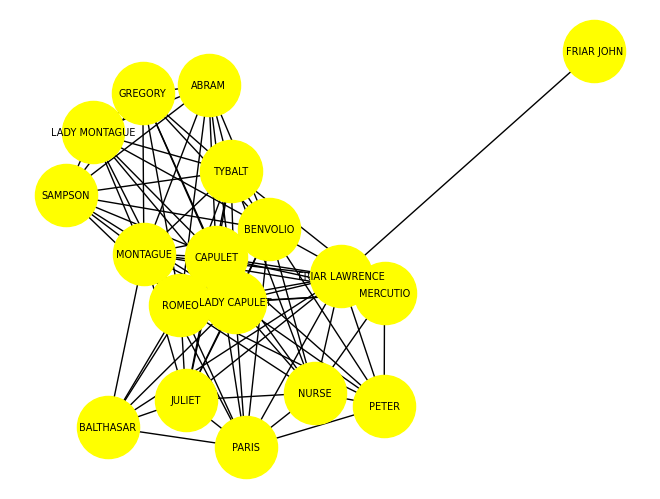

In [20]:

G=nx.Graph()
G.add_nodes_from(characters)
G.nodes()
G.add_edges_from(edge_list)

#make the font size smaller and node size bigger so that names are clearly shown in nodes.
#also changed the color of the node so that you can see the names better.
nx.draw(G, with_labels=True, node_size=2000, font_size=7, node_color='yellow', font_color="black")
plt.show()


## Submit

Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top